<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/extracting_digits_using_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracting DIGITS with EASY OCR

***EasyOCR***

End-to-End Multi-Lingual Optical Character Recognition (OCR) Solution

To install using pip

```bash
pip install easyocr
```

Installing EASY_OCR on colab


In [17]:
!pip install easyocr

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [18]:
#configuring easy ocr
import easyocr
reader = easyocr.Reader(["en"], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
import cv2
import numpy as np

In [ ]:
odo_img = cv2.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/odometer_images.jpg")

In [3]:
import matplotlib.pyplot as plt

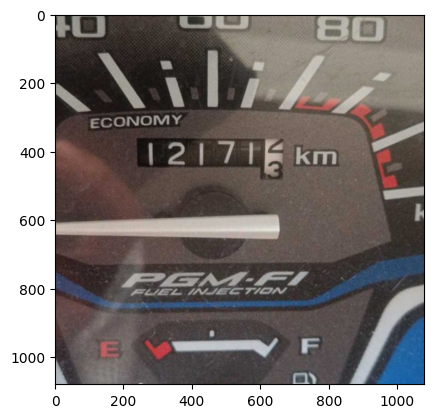

In [ ]:
plt.imshow(odo_img[:, :, ::-1])

In [ ]:
annotated_img = odo_img.copy()

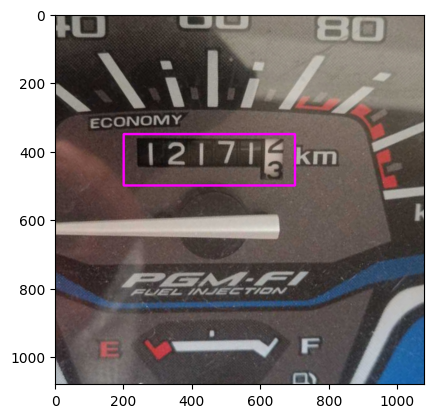

In [ ]:
cv2.rectangle(annotated_img, (200, 350), (700, 500), (255, 0, 255), thickness=5, lineType=cv2.LINE_8)
plt.imshow(annotated_img[:, :, ::-1])

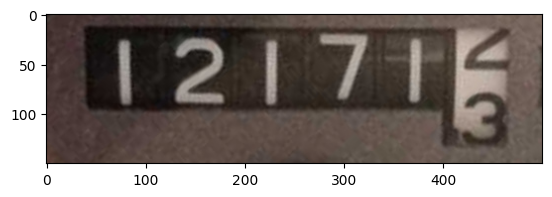

In [ ]:
#going to crop the annotated area
crop_img = odo_img[350:500, 200:700]
plt.imshow(crop_img[:, :, ::-1])

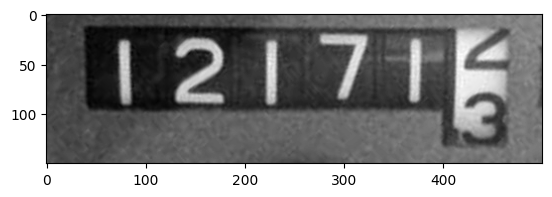

In [ ]:
#generating grey images
odo_img_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
plt.imshow(odo_img_gray, cmap="gray")

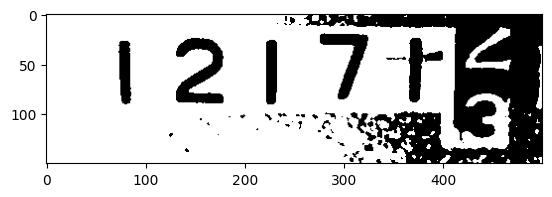

In [ ]:
#adding threshold for to the gray image
_, odo_img_thresh = cv2.threshold(odo_img_gray, 90, 255, cv2.THRESH_BINARY_INV)
plt.imshow(odo_img_thresh, cmap="gray")

In [ ]:
detection = reader.readtext(odo_img_thresh)
print("Detected reading:",detection[0][1][:-1], "Confidence Score:",detection[0][2])

Detected reading: 12171 Confidence Score: 0.7183632175468226


In [7]:
#odometer cropped image
odo_img_cropped = cv2.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/crop_img.jpg")

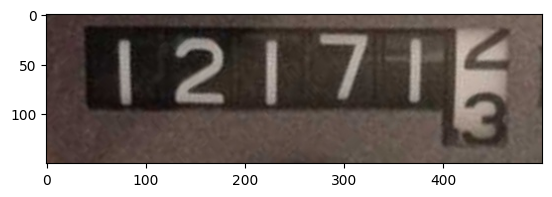

In [8]:
plt.imshow(odo_img_cropped[:, :, ::-1])

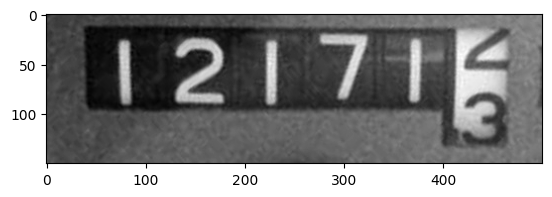

In [9]:
#converting the image to grayscale
gray_img = cv2.cvtColor(odo_img_cropped, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

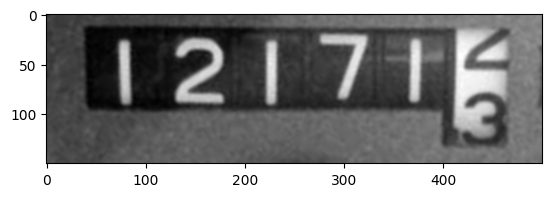

In [20]:
#applying gaussian blur to reduce noise
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
plt.imshow(blurred_img, cmap="gray")

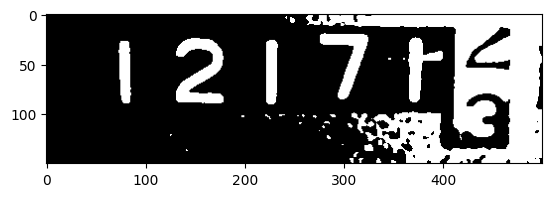

In [23]:
# Apply thresholding to enhance the text
_, thresh_image = cv2.threshold(blurred_img, 90, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_image, cmap="gray")

In [61]:
#testing with easy_ocr
detection = reader.readtext(thresh_image)
print(detection)

[([[54, 2], [484, 2], [484, 110], [54, 110]], '121712', 0.4071774701340057)]


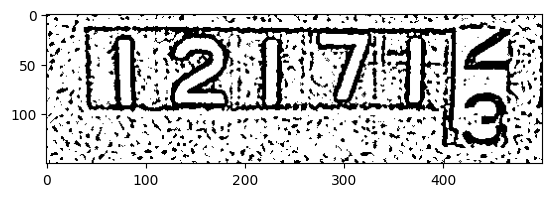

In [30]:
#trying with adaptive threshold
adaptive_thresh = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap="gray")

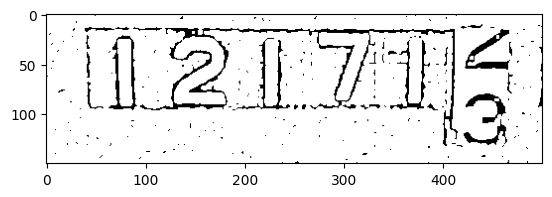

In [47]:
# Optionally, use morphological transformations (e.g., dilation)
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(adaptive_thresh, kernel, iterations=1)
plt.imshow(dilated_image, cmap="gray")

In [58]:
detection = reader.readtext(dilated_image, detail=1)
print(detection)

[([[29, 11], [412, 11], [412, 98], [29, 98]], 'LL2HTTFZ7F1', 0.06640399003475675)]


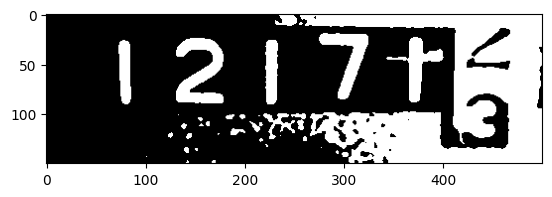

In [49]:
# Alternatively, you can try Otsu's thresholding
_, otsu_thresh = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_thresh, cmap="gray")

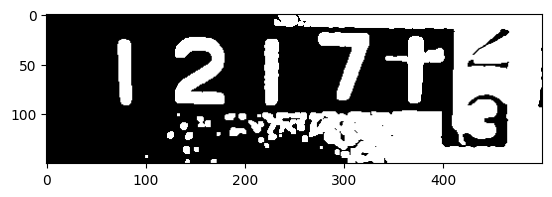

In [52]:
# Optionally, use morphological transformations (e.g., dilation)
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(otsu_thresh, kernel, iterations=1)
plt.imshow(dilated_image, cmap="gray")

In [57]:
detection = reader.readtext(dilated_image, detail=1)
print(detection)

[([[29, 11], [412, 11], [412, 98], [29, 98]], 'LL2HTTFZ7F1', 0.06640399003475675)]


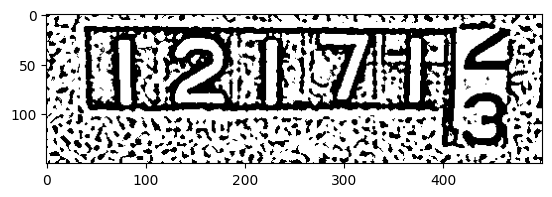

In [53]:
adaptive_mean_thresh = cv2.adaptiveThreshold(blurred_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(adaptive_mean_thresh, cmap="gray")

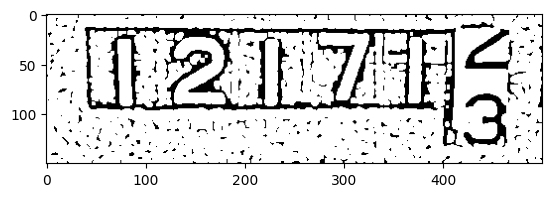

In [54]:
# Optionally, use morphological transformations (e.g., dilation)
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(adaptive_mean_thresh, kernel, iterations=1)
plt.imshow(dilated_image, cmap="gray")

In [56]:
detection = reader.readtext(dilated_image, detail=1)
print(detection)

[([[29, 11], [412, 11], [412, 98], [29, 98]], 'LL2HTTFZ7F1', 0.06640399003475675)]


## Conclussion

***Easy OCR*** working fine with ***cv2.THRESH_BINARY_INV***, ***cv2.THRESH_BINARY***